<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drve')

Drive already mounted at /content/drve; to attempt to forcibly remount, call drive.mount("/content/drve", force_remount=True).


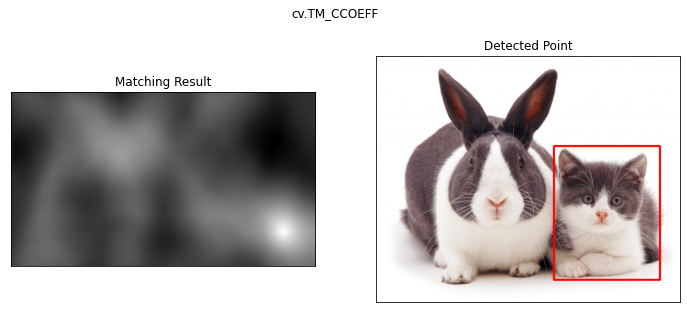

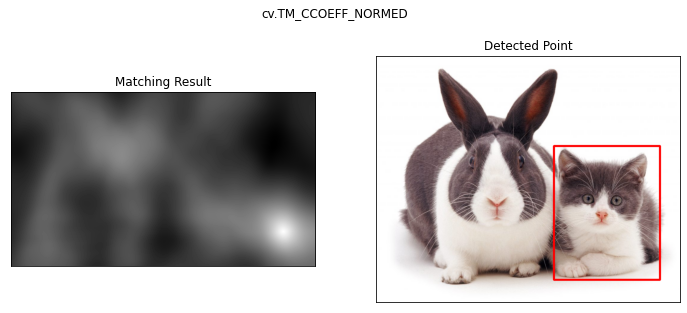

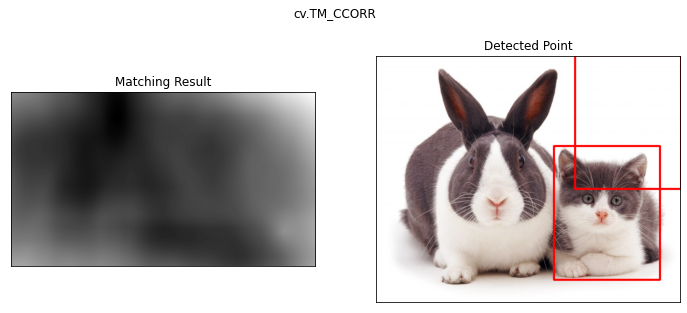

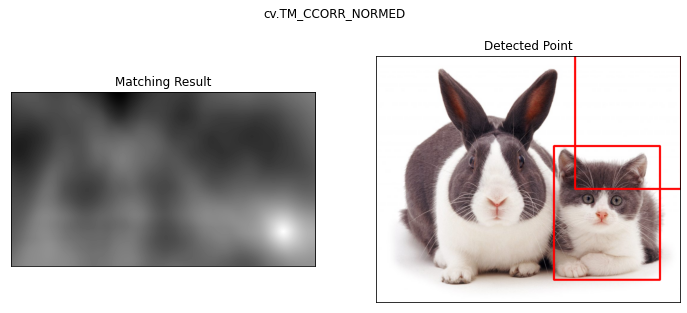

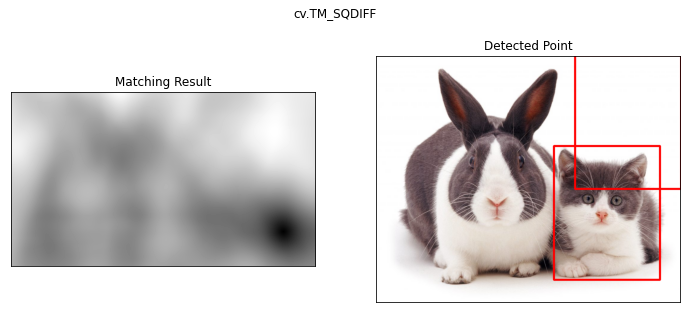

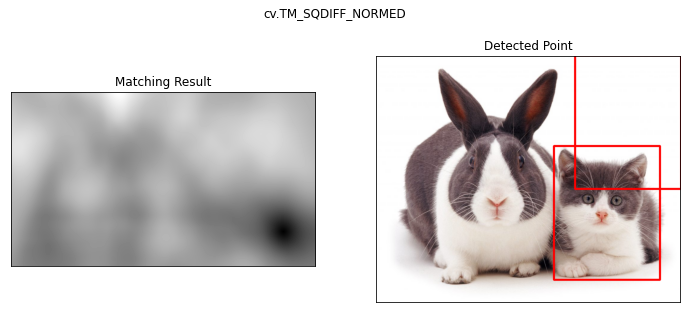

In [36]:
from __future__ import print_function
import sys
img = cv.imread('/content/drve/MyDrive/PCVK/Images/cats_and_bunnies.jpg')
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drve/MyDrive/PCVK/Images/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
for meth in methods:
    # img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img2,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, (255,0,0), 5)
    plt.figure(figsize=(12,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()